# RED WINE REPORT 


In [48]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [35]:
df=pd.read_csv("redwine.csv")


In [13]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [49]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.011257
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.105533
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [50]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [51]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# DATA VISUALIZATION


<AxesSubplot:>

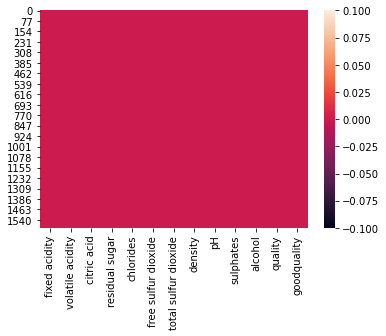

In [53]:
#To checking missing values
sns.heatmap(df.isnull())

# CORRELATION

In [62]:
dfco=df.corr()
dfco

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.015144
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.062283
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.065824
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.002950
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.043138
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.026501
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.042257
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.086778
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.030344
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.069031


<AxesSubplot:>

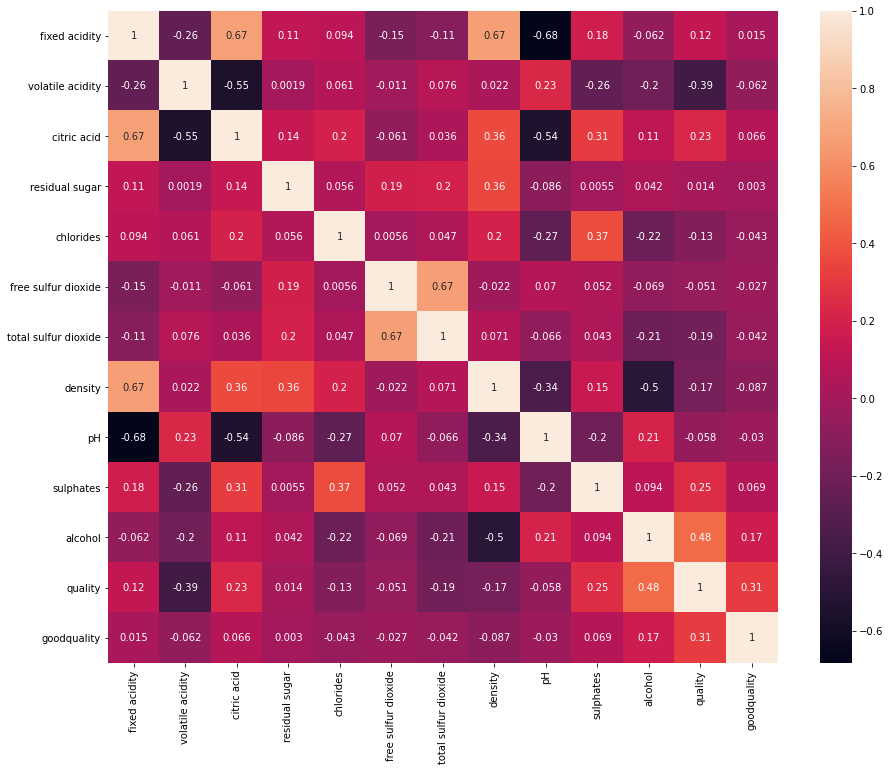

In [63]:
corr= df.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr,annot= True)

# Plotting Outliers

In [64]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'goodquality'],
      dtype='object')

In [43]:
#univariate analysis
df['fixed acidty'].plot.box()

In [44]:
df['citric acid'].plot.box()

In [45]:
df['free sulphur dioxide'].plot.box()

In [47]:
df['alcohol'].plot.box()

<AxesSubplot:>

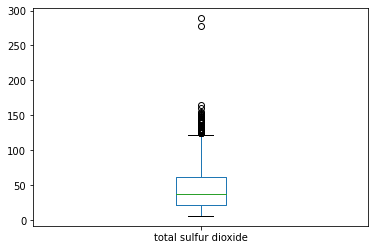

In [65]:
df['total sulfur dioxide'].plot.box()

In [66]:
df.shape

(1599, 13)

In [97]:
collist=df.columns.values
ncol=12
nrows=10

In [98]:
plt.subplot?


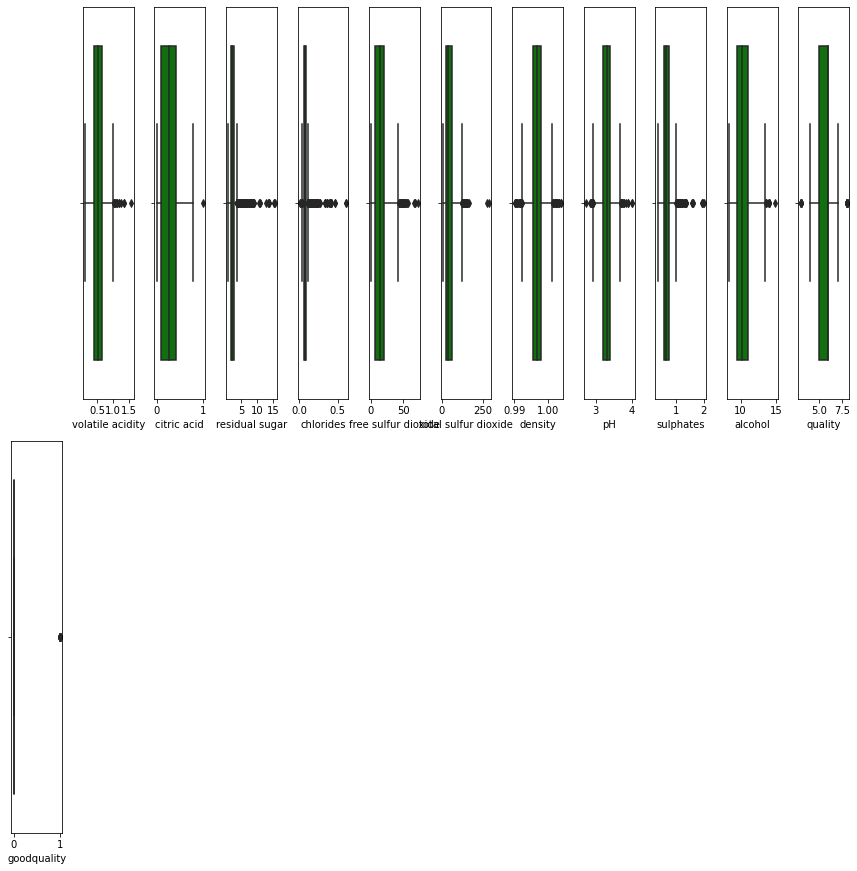

In [68]:
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Checking Skewness

<AxesSubplot:xlabel='density', ylabel='Density'>

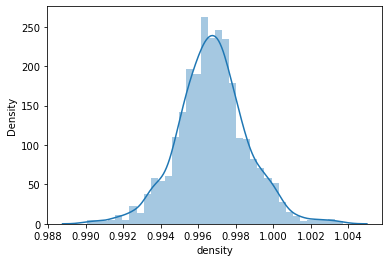

In [69]:
sns.distplot(df['density'])

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

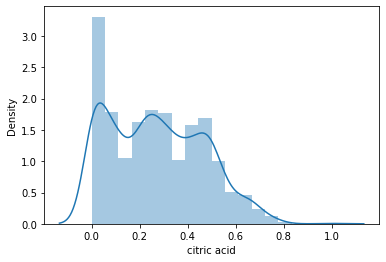

In [113]:
sns.distplot(df['citric acid'])

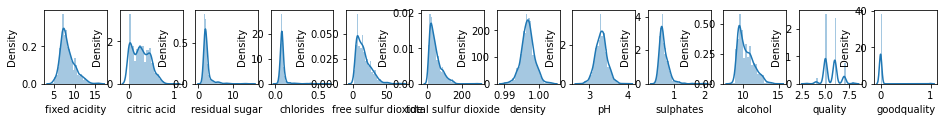

In [112]:
#plt.figure(figsize=(5*total,5*totalcol))
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

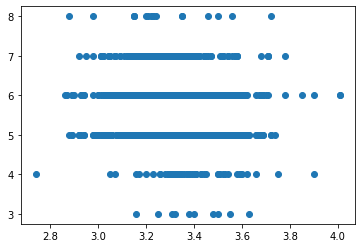

In [71]:
#bivariate analysis
plt.scatter(df['pH'],df['quality'])

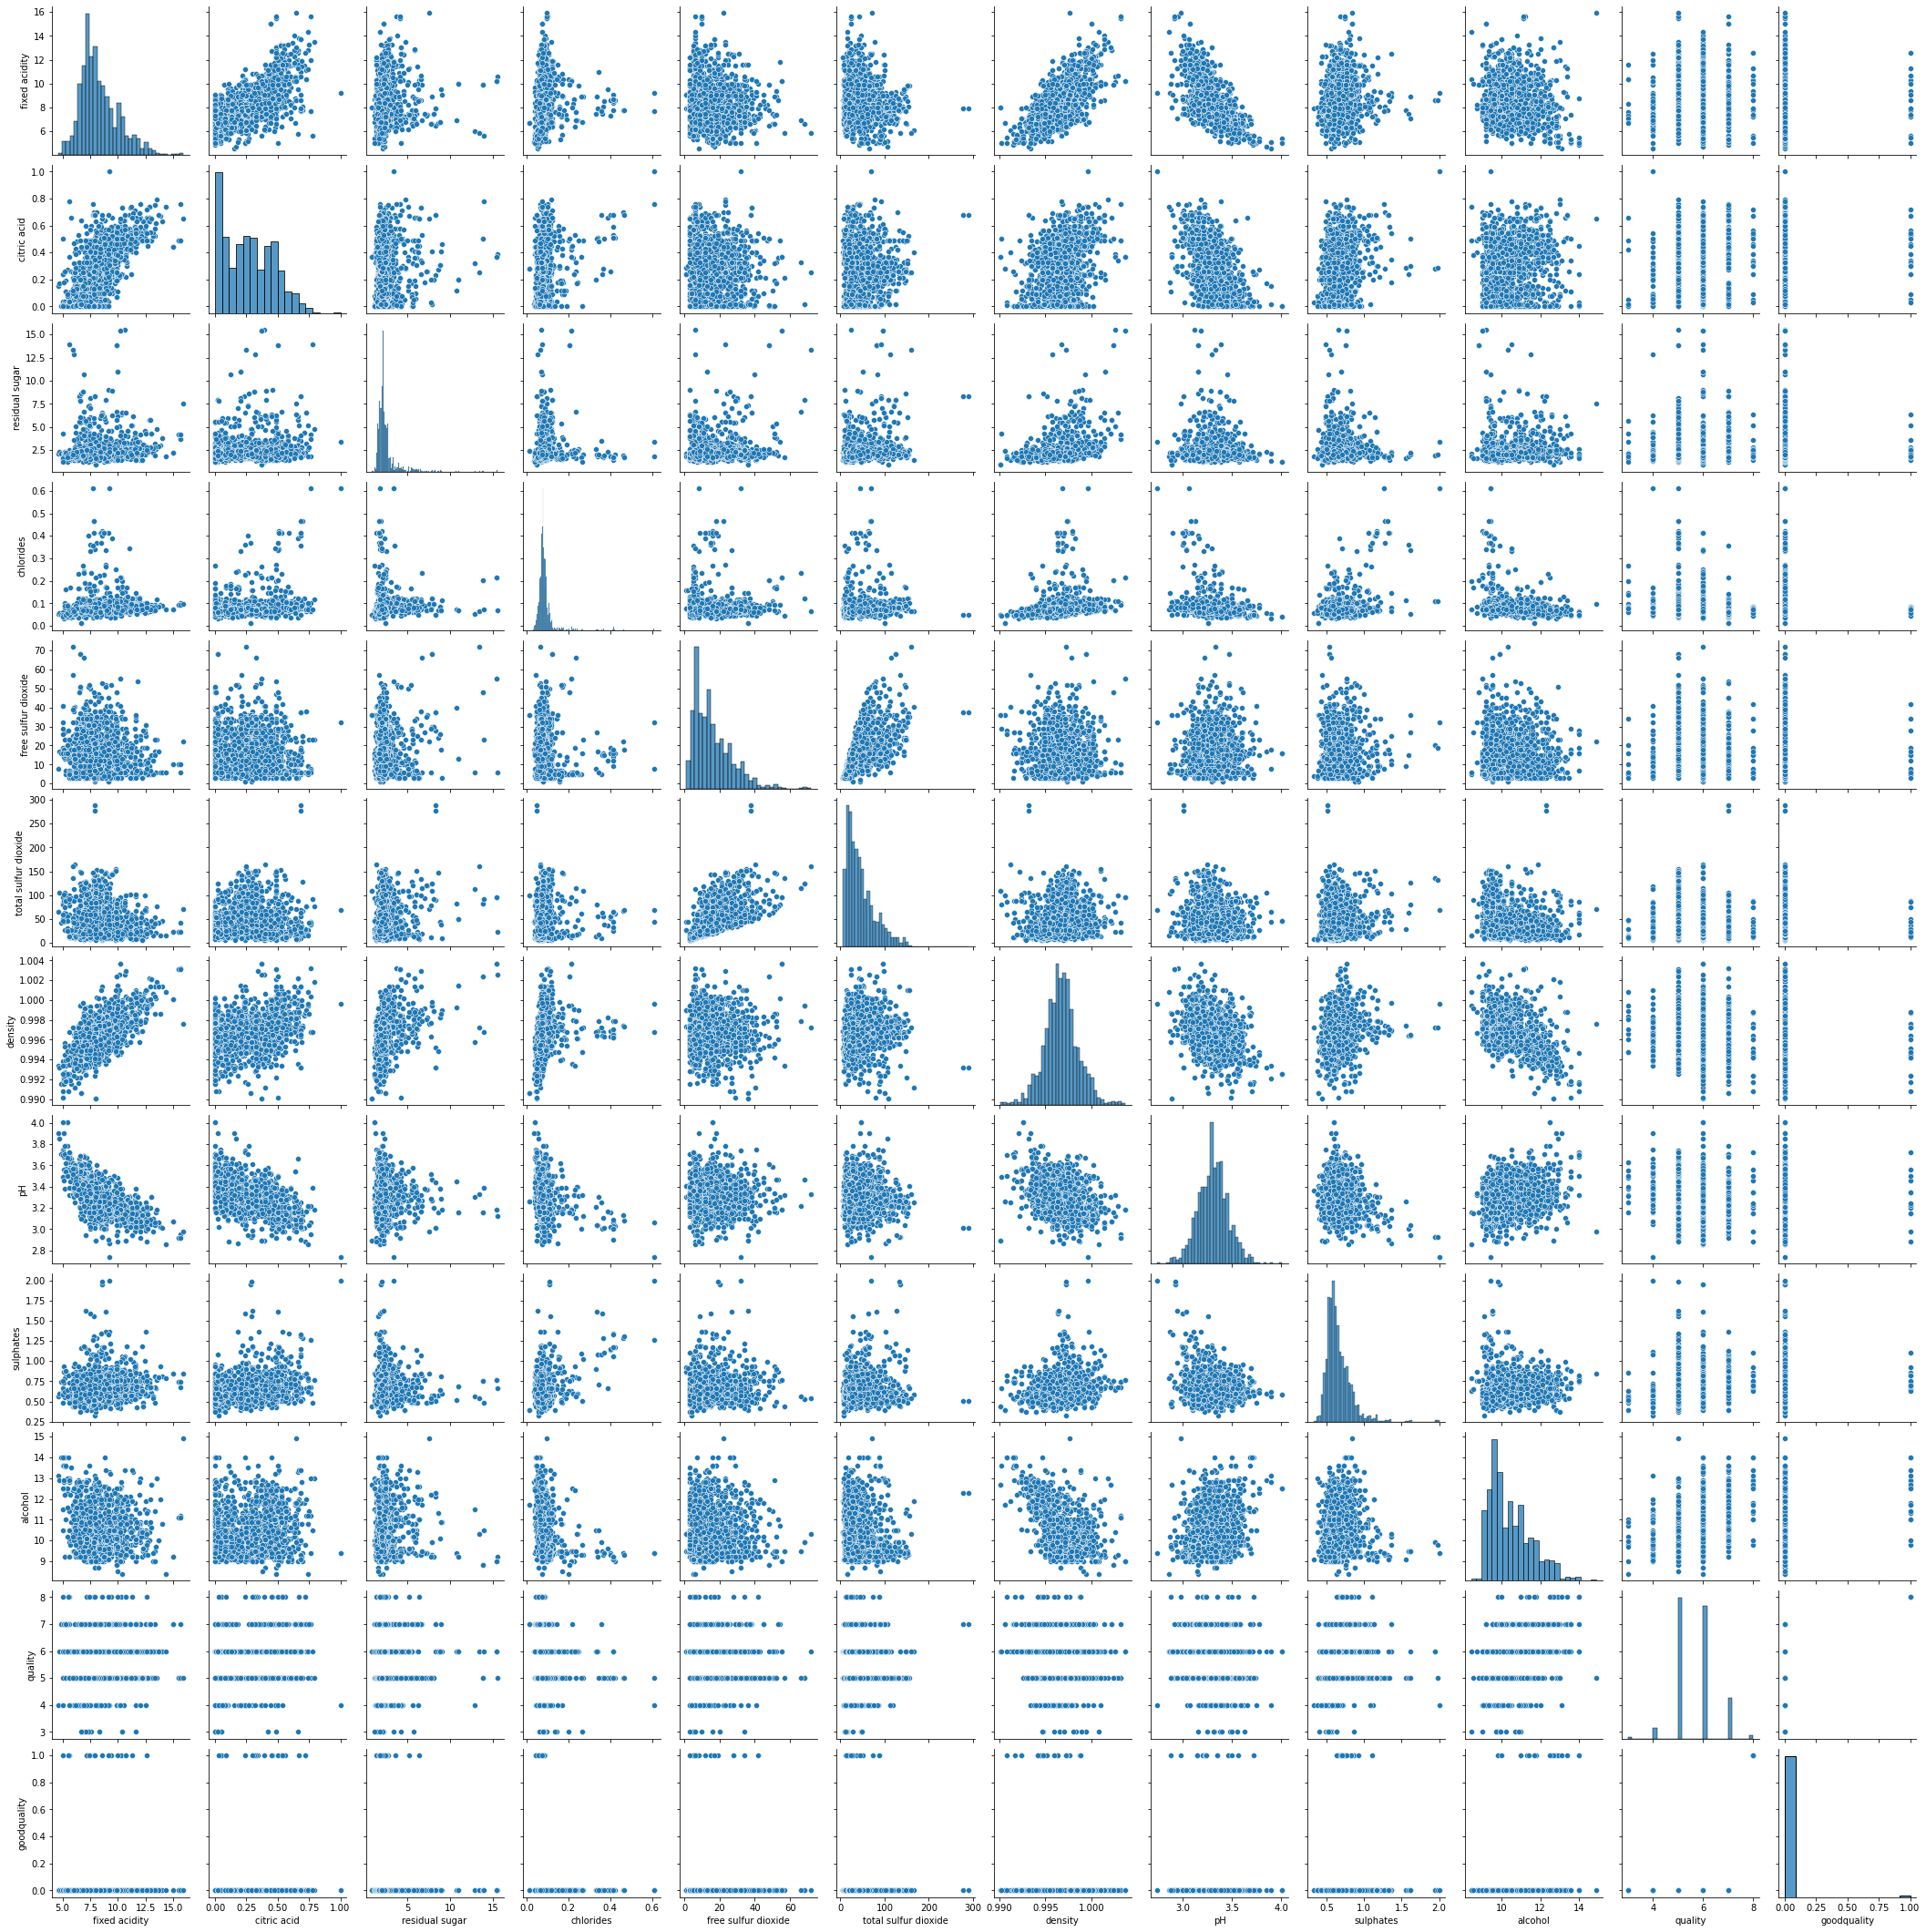

In [78]:
sns.pairplot(df)

In [79]:
#remove the missing value
#drop the negative correlated columns
#remove the outliers

In [101]:
df.head()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [102]:
df.shape

(1599, 12)

# Remove Outliers

In [103]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.52835961, 1.39147228, 0.45321841, ..., 0.96024611, 0.78782264,
        0.10670145],
       [0.29854743, 1.39147228, 0.04341614, ..., 0.58477711, 0.78782264,
        0.10670145],
       [0.29854743, 1.18607043, 0.16942723, ..., 0.58477711, 0.78782264,
        0.10670145],
       ...,
       [1.1603431 , 0.72391627, 0.16942723, ..., 0.54162988, 0.45084835,
        0.10670145],
       [1.39015528, 0.77526673, 0.38227061, ..., 0.20930812, 0.78782264,
        0.10670145],
       [1.33270223, 1.02199944, 0.75289408, ..., 0.54162988, 0.45084835,
        0.10670145]])

In [104]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   42,   43,   45,
         57,   81,   81,   83,   86,   88,   91,   92,   95,  106,  106,
        109,  142,  144,  147,  151,  151,  151,  151,  163,  164,  169,
        169,  181,  226,  226,  240,  243,  244,  258,  258,  267,  274,
        278,  281,  291,  324,  325,  339,  340,  347,  354,  374,  381,
        390,  391,  396,  396,  400,  400,  440,  442,  442,  451,  455,
        459,  467,  480,  480,  481,  494,  495,  498,  515,  517,  544,
        554,  554,  555,  555,  557,  557,  568,  584,  588,  588,  591,
        595,  608,  614,  636,  639,  649,  649,  651,  652,  652,  652,
        672,  684,  690,  692,  692,  695,  723,  730,  754,  776,  777,
        795,  821,  828,  832,  836,  837,  889,  899,  911,  917,  923,
        925,  926,  982, 1017, 1018, 1043, 1051, 1051, 1061, 1071, 1074,
       1079, 1079, 1081, 1081, 1090, 1111, 1114, 1120, 1131, 1154, 1165,
       1175, 1186, 1202, 1231, 1235, 1244, 1244, 1

In [109]:
#rows and columnss
z[13][8]

5.32210116796055

In [87]:
z[15][5]

3.087489568732511

In [89]:
z[1589][2]

3.732701384742145

In [95]:
df_new=df[(z<3).all(axis=1)]

In [106]:
df_new

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [107]:
df.shape

(1599, 12)

In [108]:
df_new.shape

(1442, 12)

In [ ]:
#141 rows are deleted as on outlier